# Semester Project - Update 1
## Levi Sprung

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data
Some lines are commented out since I am not planning on using that data, although I may copy and paste the lines for later use.

In [9]:
combine = pd.read_csv('data/combine.csv')
draft = pd.read_csv('data/draft.csv')
# fumbles = pd.read_csv('data/fumbles.csv')
# fumblForced = pd.read_csv('data/fumblForced.csv')
gameParticipation = pd.read_csv('data/gameParticipation.csv')
games = pd.read_csv('data/games.csv')
# interceptions = pd.read_csv('data/interceptions.csv')
# kickReturns = pd.read_csv('data/kickReturns.csv')
# kicks = pd.read_csv('data/kicks.csv')
# officials = pd.read_csv('data/officials.csv')
# passDef = pd.read_csv('data/passDef.csv')
# passer = pd.read_csv('data/passer.csv')
# penalties = pd.read_csv('data/penalties.csv')
# players = pd.read_csv('data/players.csv')
plays = pd.read_csv('data/plays.csv')
# qhHits = pd.read_csv('data/qhHits.csv')
# receiver = pd.read_csv('data/receiver.csv')
# rusher = pd.read_csv('data/rusher.csv')
# sacks = pd.read_csv('data/sacks.csv')
# tackles = pd.read_csv('data/tackles.csv')

## Data Cleaning

In [10]:
from datetime import datetime

# variables which are different for each player
categorical = ['playerId', 'nameFirst', 'nameLast', 'nameFull', 'position', 'collegeId', 'nflId', 'combineId', 'college', 'heightInches', 'weight',
       'dob', 'ageAtDraft']

# getting access to game info
games_with_participation = pd.merge(games, gameParticipation, on='gameId')

# reference date for creating date ints
reference_date = datetime(2004, 8, 9).date()

def days_since(date_str):
    # make date object
    date_obj = datetime.strptime(date_str, '%Y-%m-%d').date()
    # difference between dates
    delta = (date_obj - reference_date).days
    return delta
    
# make number representing game date as days since reference date
games_with_participation['gameDateNum'] = games_with_participation['gameDate'].apply(days_since)
games_with_participation

,gameId,season,week,gameDate,gameTimeEastern,gameTimeLocal,homeTeamId,visitorTeamId,seasonType,weekNameAbbr,...,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry,gameDateNum
0,56426,2014,0,2014-08-03,20:10:00,20:10:00,610,3410,PRE,HOF,...,22.835616,http://www.nfl.com/player/ChrisGragg/2539202/p...,Pine Bluff,AR,USA,Warren HS,NaN,AR,USA,3646
1,56426,2014,0,2014-08-03,20:10:00,20:10:00,610,3410,PRE,HOF,...,21.895890,http://www.nfl.com/player/DougLegursky/4269/pr...,Frankfurt,NaN,Germany,Woodrow Wilson HS,Beckley,WV,USA,3646
2,56426,2014,0,2014-08-03,20:10:00,20:10:00,610,3410,PRE,HOF,...,20.810959,http://www.nfl.com/player/CyrusKouandjio/25434...,NaN,NaN,Cameroon,DeMatha Catholic HS,Hyattsville,MD,USA,3646
3,56426,2014,0,2014-08-03,20:10:00,20:10:00,610,3410,PRE,HOF,...,22.402740,http://www.nfl.com/player/AntoineMcClain/25329...,Anniston,AL,USA,Anniston HS,NaN,AL,USA,3646
4,56426,2014,0,2014-08-03,20:10:00,20:10:00,610,3410,PRE,HOF,...,21.054795,http://www.nfl.com/player/RobertWoods/2540169/...,Gardena,CA,USA,Junipero Serra HS,Gardena,CA,USA,3646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422250,58167,2019,22,2020-02-02,18:30:00,18:30:00,2310,4500,POST,SB,...,27.172603,http://www.nfl.com/player/MitchWishnowsky/2562...,Gosnells,NaN,Australia,Lumen Christi College,Perth,NaN,Australia,5655
422251,58167,2019,22,2020-02-02,18:30:00,18:30:00,2310,4500,POST,SB,...,21.476712,http://www.nfl.com/player/DJReed/2560850/profile,Bakersfield,CA,USA,Independence HS,Bakersfield,CA,USA,5655
422252,58167,2019,22,2020-02-02,18:30:00,18:30:00,2310,4500,POST,SB,...,24.583562,http://www.nfl.com/player/KyleNelson/2530722/p...,Norman,OK,USA,China Spring HS,NaN,TX,USA,5655
422253,58167,2019,22,2020-02-02,18:30:00,18:30:00,2310,4500,POST,SB,...,23.394521,http://www.nfl.com/player/RobbieGould/2506264/...,Jersey Shore,PA,USA,Central Mountian East HS,Lock Haven,PA,USA,5655


#### Make variables for:
 1. Total snaps taken between tracked games (2004-2019)
 2. Date of first game played 
 3. Date of last game played
 4. Days between last and first game

In [11]:
grouped = games_with_participation.groupby(categorical, as_index=False).agg({'gamePartSnapCount':'sum', 'gameDateNum':['min', 'max']})

grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

grouped = grouped.rename(columns={'gamePartSnapCount sum':'totalSnaps', 'gameDateNum min':'firstGame', 'gameDateNum max':'lastGame'})
grouped['daysActive'] = grouped['lastGame'] - grouped['firstGame']
grouped

,playerId,nameFirst,nameLast,nameFull,position,collegeId,nflId,combineId,college,heightInches,weight,dob,ageAtDraft,totalSnaps,firstGame,lastGame,daysActive
0,19980001,Peyton,Manning,Peyton Manning,QB,37998.0,2501863.0,13825.0,Tennessee,77.0,230.0,1976-03-24,22.082192,3750,3650,3807,157
1,19980439,Phil,Dawson,Phil Dawson,K,78712.0,2500351.0,13740.0,Texas,71.0,200.0,1975-01-23,23.249315,1024,3650,4892,1242
2,19990007,Champ,Bailey,Champ Bailey,DB,30602.0,2499489.0,13973.0,Georgia,72.0,192.0,1978-06-22,20.832877,108,3666,3671,5
3,20000199,Tom,Brady,Tom Brady,QB,48109.0,2504211.0,14362.0,Michigan,76.0,225.0,1977-08-03,22.715068,11430,3658,5626,1968
4,20010001,Michael,Vick,Michael Vick,QB,24061.0,2504531.0,14843.0,Virginia Tech,73.0,210.0,1980-06-26,20.832877,975,3650,3793,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,20190493,Dax,Raymond,Dax Raymond,TE,84322.0,2562710.0,20451.0,Utah State,77.0,245.0,1994-11-30,24.424658,160,5477,5498,21
2810,20190495,Brett,Rypien,Brett Rypien,QB,83725.0,2562718.0,20454.0,Boise State,74.0,202.0,1996-07-09,22.816438,188,5470,5498,28
2811,20190497,Kyle,Shurmur,Kyle Shurmur,QB,37240.0,2562731.0,20463.0,Vanderbilt,76.0,225.0,1996-11-06,22.487671,214,5479,5498,19
2812,20190511,James,Williams,James Williams,RB,99164.0,2562786.0,20491.0,Washington State,69.0,197.0,1996-05-17,22.961644,12,5498,5498,0


#### Next steps:
1. Removing players with invalid game date range
2. Making variable for snaps per day active

In [12]:
draft_and_snaps = pd.merge(grouped, draft, on=categorical)

draft_and_snaps.drop(['draftTeam', 'teamId', 'playerProfileUrl',
       'homeCity', 'homeState', 'homeCountry', 'highSchool', 'hsCity',
       'hsState', 'hsCountry'], axis=1, inplace=True)

draft_and_snaps['daysActive'].replace(0, np.nan, inplace=True)
draft_and_snaps.dropna(subset=['totalSnaps', 'daysActive'], inplace=True)
    
draft_and_snaps['snapsPerDaysActive'] = draft_and_snaps['totalSnaps']/draft_and_snaps['daysActive']
draft_and_snaps

,playerId,nameFirst,nameLast,nameFull,position,collegeId,nflId,combineId,college,heightInches,...,ageAtDraft,totalSnaps,firstGame,lastGame,daysActive,draft,round,pick,draftTradeValue,snapsPerDaysActive
0,19980001,Peyton,Manning,Peyton Manning,QB,37998.0,2501863.0,13825.0,Tennessee,77.0,...,22.082192,3750,3650,3807,157.0,1998,1.0,1,3000.00,23.885350
1,19990007,Champ,Bailey,Champ Bailey,DB,30602.0,2499489.0,13973.0,Georgia,72.0,...,20.832877,108,3666,3671,5.0,1999,1.0,7,1500.00,21.600000
2,20000199,Tom,Brady,Tom Brady,QB,48109.0,2504211.0,14362.0,Michigan,76.0,...,22.715068,11430,3658,5626,1968.0,2000,6.0,199,11.80,5.807927
3,20010001,Michael,Vick,Michael Vick,QB,24061.0,2504531.0,14843.0,Virginia Tech,73.0,...,20.832877,975,3650,3793,143.0,2001,1.0,1,3000.00,6.818182
4,20010004,Justin,Smith,Justin Smith,DE,65211.0,2504777.0,14813.0,Missouri,76.0,...,21.572603,2151,3667,3793,126.0,2001,1.0,4,1800.00,17.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,20190240,Jackson,Barton,Jackson Barton,OT,84112.0,2562624.0,20252.0,Utah,79.0,...,23.736986,314,5477,5498,21.0,2019,NaN,240,1.36,14.952381
1987,20190241,Jalen,Jelks,Jalen Jelks,DE,97403.0,2562290.0,20386.0,Oregon,78.0,...,22.747945,160,5479,5493,14.0,2019,NaN,241,1.32,11.428571
1988,20190245,Chris,Slayton,Chris Slayton,DT,13244.0,2562735.0,20465.0,Syracuse,75.0,...,22.753425,210,5477,5498,21.0,2019,NaN,245,1.16,10.000000
1989,20190251,Dakota,Allen,Dakota Allen,LB,79415.0,2562618.0,20233.0,Texas Tech,73.0,...,23.501370,498,5479,5620,141.0,2019,NaN,251,0.92,3.531915


## Filtering:
One issue that we will need to take care of is that this data does not encompass many players' careers. This would be much easier to deal with if we had access to when each player retired. 

Some possible solutions:
1. Remove players who were drafted before 2004
2. Remove players who were drafted after a certain date
3. Remove players who played their last game in 2019
4. Create variables for surpassing a certain value for snaps played or days active (which would hopefully be able to account for data being cut off)

In [13]:
filtered = draft_and_snaps[draft_and_snaps['draft'] >= 2004] # draft year >= 2004 (seems beneficial to use in most cases)
filtered1 = filtered[filtered['draft'] <= 2008] # 2004 <= draft year <= 2008
filtered2 = filtered[filtered['draft'] <= 2013] # 2004 <= draft year <= 2013

In [16]:
bounding_date = datetime(2019, 6, 1).date()
delta_bound = (bounding_date - reference_date).days 

filtered3 = filtered[filtered['lastGame'] < delta_bound] # last game is before June 1, 2019

filtered3 = filtered3[filtered3['draft'] <= 2015] # 2004 <= draft year <= 2015

## Larger problem:
### The game participation data starts at 2014

Possible solutions:
1. Only use 2014-2019 data
- Could see how many snaps played between these years
- Filtering draft years would allow us to look at a specific time frame and get the best conclusion
2. Look at play-by-play data 
- This extends from 2004-2019
- We could pick a statistic (receiving yards) and use it as the target
 - Maybe could do the same with other targets

Let's take a stab at the receiving data
---

In [17]:
receiver = pd.read_csv('data/receiver.csv')
receiving_yards = receiver.groupby(['playerId'], as_index=False)['recYards'].sum()

receiving_yards

,playerId,recYards
0,19850016,483
1,19880006,231
2,19890005,0
3,19900017,119
4,19900058,1132
...,...,...
3189,20191175,36
3190,20191176,40
3191,20191178,12
3192,20191183,-14


## Seems like we have a usable target

Another merge will now be required to get access to more features

In [31]:
receiving_combine = pd.merge(receiving_yards, combine, on=['playerId'])
draft_year = draft.loc[:, ['playerId', 'draft']]
receiving_combine = pd.merge(receiving_combine, draft_year, on=['playerId'])

## Now we have some features that we can use

Let's do some filtering

In [32]:
wide_receivers = receiving_combine[receiving_combine['combinePosition'] == 'WR']
tight_ends = receiving_combine[receiving_combine['combinePosition'] == 'TE']

wide_receivers

,playerId,recYards,combineId,combineYear,combinePosition,combineHeight,combineWeight,combineHand,nameFirst,nameLast,...,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic,draft
0,19880006,231,10297,1988,WR,72.0,193,9.00,Tim,Brown,...,NaN,4.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988
2,19900058,1132,11131,1990,WR,70.8,181,9.50,Ricky,Proehl,...,29.50,4.58,34.0,NaN,4.01,117.0,NaN,11.31,NaN,1990
5,19910326,2169,11471,1991,WR,71.9,175,10.25,Keenan,McCardell,...,32.00,4.56,36.5,NaN,4.18,122.0,NaN,11.46,NaN,1991
7,19920036,2337,12002,1992,WR,72.8,200,10.13,Jimmy,Smith,...,32.63,4.58,35.0,NaN,4.14,120.0,NaN,11.29,NaN,1992
11,19930007,432,12156,1993,WR,72.3,185,8.75,Curtis,Conway,...,31.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,20190120,24,20388,2019,WR,73.0,214,NaN,Gary,Jennings,...,NaN,4.42,37.0,20.0,4.15,127.0,7.32,NaN,NaN,2019
1189,20190174,746,20396,2019,WR,73.0,201,NaN,KeeSean,Johnson,...,NaN,4.60,30.0,14.0,4.23,117.0,7.28,NaN,NaN,2019
1192,20190184,294,20330,2019,WR,74.0,215,NaN,Travis,Fulgham,...,NaN,4.58,36.5,15.0,NaN,126.0,NaN,NaN,NaN,2019
1195,20190206,906,20356,2019,WR,74.0,221,NaN,Kelvin,Harmon,...,NaN,4.60,32.5,18.0,4.32,117.0,7.15,NaN,NaN,2019


In [33]:
wide_receivers.to_csv('WR.csv')

# Visualization
- Although similar preprocessing could be beneficial for other positions, I will cross that bridge if I get to it
- For now, I will just do some visualization on the receiving stats

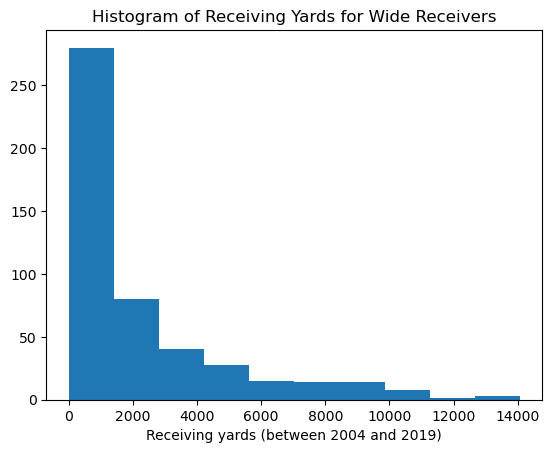

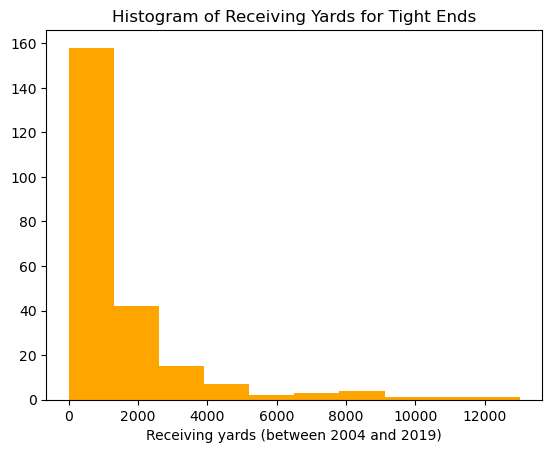

In [34]:
plt.hist('recYards', data=wide_receivers)
plt.title("Histogram of Receiving Yards for Wide Receivers")
plt.xlabel('Receiving yards (between 2004 and 2019)')
plt.show()
plt.hist('recYards', data=tight_ends, color='orange')
plt.title("Histogram of Receiving Yards for Tight Ends")
plt.xlabel('Receiving yards (between 2004 and 2019)')
plt.show()

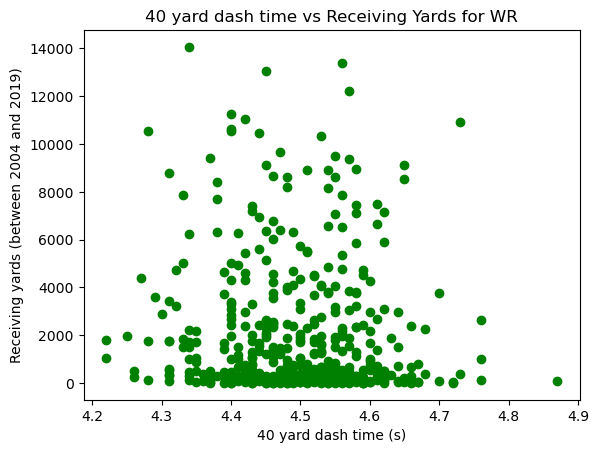

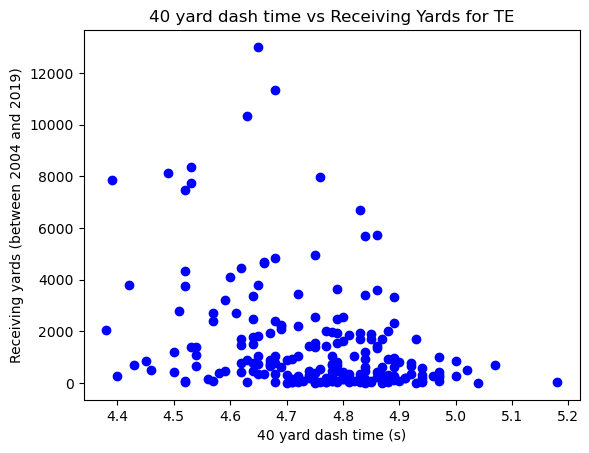

In [35]:
wr_40yd = wide_receivers.dropna(subset=['combine40yd'])

plt.title('40 yard dash time vs Receiving Yards for WR')
plt.xlabel('40 yard dash time (s)')
plt.ylabel('Receiving yards (between 2004 and 2019)')
plt.scatter(wr_40yd['combine40yd'], wr_40yd['recYards'], color='green')
plt.show()

te_40yd = tight_ends.dropna(subset=['combine40yd'])

plt.title('40 yard dash time vs Receiving Yards for TE')
plt.xlabel('40 yard dash time (s)')
plt.ylabel('Receiving yards (between 2004 and 2019)')
plt.scatter(te_40yd['combine40yd'], te_40yd['recYards'], color='blue')
plt.show()